In [1]:
'''Q1. Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation
        of 5 using Python. Interpret the results.'''

import scipy.stats as stats
import math
sample_mean = 50
std_dev = 5
sample_size = 100

confidence_level = 0.95
alpha = 1 - confidence_level
t_value = stats.t.ppf(1-alpha/2, df=sample_size-1)
std_error_mean = std_dev / (math.sqrt(sample_size))

margin_of_error = t_value * std_error_mean

lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print('significance value:',alpha)
print('t_value:',t_value)
print(f"Mean Estimate with 95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

significance value: 0.050000000000000044
t_value: 1.9842169515086827
Mean Estimate with 95% Confidence Interval: (49.01, 50.99)


In [2]:
"""Q2. Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag
matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20%
brown. Use Python to perform the test with a significance level of 0.05."""
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2

# observed frequencies
obs_freq = np.array([20,15,2,3,5,10])
# expected frequencies
exp_freq = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(obs_freq)

sign_value = 0.05
c_i = 1- sign_value

dof = len(obs_freq)-1

res = chi2.ppf(c_i,dof)
print(f"Critical Chi Square value for {sign_value} significance level for {dof} degrees of freedom is : {res:.4f}")

test_statistcal,p_value = chisquare(obs_freq,exp_freq)
print("Test Chi2 statistic:", test_statistcal)
print("p-value:", p_value)

if p_value < sign_value:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

Critical Chi Square value for 0.05 significance level for 5 degrees of freedom is : 11.0705
Test Chi2 statistic: 17.454545454545453
p-value: 0.003713739030589342
Reject null hypothesis


In [4]:
'''Q3.Use Python to calculate the chi-square statistic and p-value for a contingency table with the 
following data:'''

'''
Group A	Group B
Outcome 1	20	15
Outcome 2	10	25
Outcome 3	15	20  '''

import pandas as pd
from scipy.stats import chi2_contingency

sign_val = 0.05
obs_df = pd.DataFrame({'Group A':[20,10,15],'Group B':[15,25,20]})
obs_df.index = ['Outcome 1','Outcome 2','Outcome 3']
print("Observed Dataframe Below :\n")
print(obs_df)
print("\n-----------------------\n")

# calulate chi-square stattistics and p-value
statistics ,p_val,dof,expected = chi2_contingency(obs_df)
# Print Expected DataFrame
expected_df = pd.DataFrame(expected)
expected_df.columns = ['Group A','Group B']
expected_df.index = ['Outcome 1','Outcome 2','Outcome 3']
print("Expected Values Dataframe Below :\n")
print(expected_df)

print('Chi-square Statistics :',statistics)
print('P_value :',p_val)

if p_value < sign_val :
    print("Reject the Null Hypothesis")
else:
    print("Failed to reject the Null Hypothesis")

Observed Dataframe Below :

           Group A  Group B
Outcome 1       20       15
Outcome 2       10       25
Outcome 3       15       20

-----------------------

Expected Values Dataframe Below :

           Group A  Group B
Outcome 1     15.0     20.0
Outcome 2     15.0     20.0
Outcome 3     15.0     20.0
Chi-square Statistics : 5.833333333333334
P_value : 0.05411376622282158
Reject the Null Hypothesis


In [5]:
'''Q4. A study of the prevalence of smoking in a population of 500 individuals found that 60 individuals
        smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals 
        in the population who smoke.'''


import scipy.stats as stats
import math

n = 500
x = 60
p = x/n

confidence_level = 0.95
alpha = 1 - confidence_level
z = stats.norm.ppf(1-alpha/2)
print(f'Critical Z statistic for {confidence_level*100}% is {z:.4f}')

se = math.sqrt((p*(1-p))/n)

lower_ci = p - z*se
upper_ci = p + z*se

print("95% confidence interval : ({:.2f}%, {:.2f}%)".format(lower_ci*100, upper_ci*100))

Critical Z statistic for 95.0% is 1.9600
95% confidence interval : (9.15%, 14.85%)


In [6]:
'''Q5. Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation
        of 12 using Python. Interpret the results.'''


import scipy.stats as stats
import math

mean = 75
std = 12
n = 30 
d0f = n - 1

confidence_level = 0.90
sign_val = 1 -  confidence_level

t_critical = stats.t.ppf(1 - sign_val/2, dof)
print(f't_critical for {n} samples with {confidence_level*100}% confidence is : {t_critical:.4f}')

sem = std / math.sqrt(n)

lower_ci = mean - t_critical * sem
upper_ci = mean + t_critical * sem

print("90% confidence interval: ({:.3f}, {:.3f})".format(lower_ci, upper_ci))

t_critical for 30 samples with 90.0% confidence is : 2.9200
90% confidence interval: (68.603, 81.397)


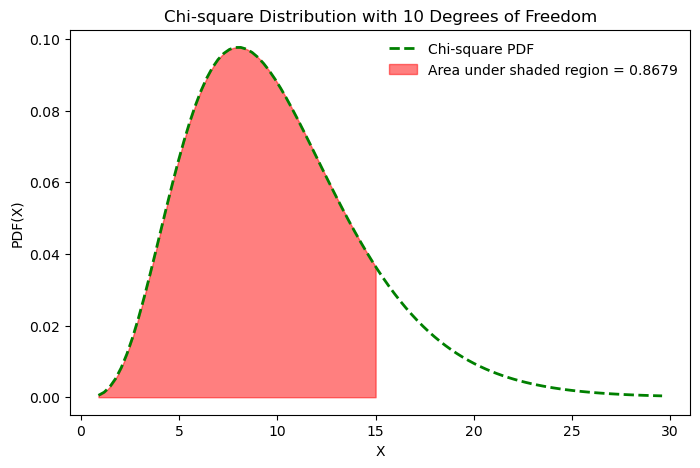

In [7]:
'''Q6. Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the
        area corresponding to a chi-square statistic of 15.'''

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df = 10
x = np.linspace(stats.chi2.ppf(0.0001, df), stats.chi2.ppf(0.999, df), 100)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(x, stats.chi2.pdf(x, df), '--g', lw=2, label='Chi-square PDF')

# Calculating area under curve 
area = stats.chi2.cdf(15,df)

# Shade area under the curve
x_fill = np.linspace(stats.chi2.ppf(0.0001, df), 15, 100)
ax.fill_between(x_fill, stats.chi2.pdf(x_fill, df), color='red', alpha=0.5,label = f'Area under shaded region = {area:.4f}')

# Add legend and labels
ax.legend(loc='best', frameon=False)
ax.set_xlabel('X')
ax.set_ylabel('PDF(X)')
ax.set_title('Chi-square Distribution with 10 Degrees of Freedom')

plt.show()

In [8]:
'''Q7. A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520
        preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the 
        population who prefer Coke.'''

import scipy.stats as st

n = 1000
x = 520
conf_level = 0.99
df = n - 1

p = x / n
se = ((p * (1 - p)) / n) ** 0.5#root over

# Find the t-value
t = st.t.ppf((1 + conf_level) / 2, df)

# Print the critical value
print(f'Critical T-statistic for {conf_level*100}% confidence for {n} samples is : {t:.4f}')

# Calculate the confidence interval
lower = p - t * se
upper = p + t * se

print(f"Estimated mean population proportion with {conf_level*100}% Confidence interval: ({lower*100:.2f}%, {upper*100:.2f})")


Critical T-statistic for 99.0% confidence for 1000 samples is : 2.5808
Estimated mean population proportion with 99.0% Confidence interval: (47.92%, 56.08)


In [9]:
'''Q8. A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and 
        observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match
        the expected frequencies of a fair coin. Use a significance level of 0.05.'''


import scipy.stats as stats

observed_frequencies = [45, 55]
expected_frequencies = [50, 50]

test_statistic, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)
#Calculate a one-way chi-square test.
print("Chi-Square Test Statistic: {:.4f}".format(test_statistic))
print("P-value: {:.4f}".format(p_value))

# significance level
alpha = 0.05

if p_value < alpha:
    print(f"Reject the null hypothesis")
else:
    print(f"Fail to reject the null hypothesis")

Chi-Square Test Statistic: 1.0000
P-value: 0.3173
Fail to reject the null hypothesis


In [11]:
'''Q9. A study was conducted to determine if there is an association between smoking status (smoker or
    non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below.
    Conduct a chi-square test for independence to determine if there is a significant association between
    smoking status and lung cancer diagnosis        Use a significance level of 0.05.
    .'''


import pandas as pd
import scipy.stats as stats

observed_df = pd.DataFrame({'Lung Cancer:Yes':[60,30], 'Lung Cancer:No':[140,170]})
observed_df.index = ['Smoker','Non Smoker']

print('Observed Data :')
print(observed_df)
print('\n----------------------------------------------\n')

# Compute the chi-square test statistic and p-value
test_statistic, p_value, dof, expected = stats.chi2_contingency(observed_df)

# Print expected df
expected_df = pd.DataFrame(expected)
expected_df.columns = observed_df.columns
expected_df.index = observed_df.index
print('Expected Data :')
print(expected_df)

print("\nChi-Square Test Statistic: {:.4f}".format(test_statistic))
print("P-value: {:.4f}".format(p_value))

sign_val = 0.05

if p_value < sign_val:
        print(f"Reject the null hypothesis.\nConclusion ")
else:
    print(f"Fail to reject the null hypothesis.\nConculsion ")

Observed Data :
            Lung Cancer:Yes  Lung Cancer:No
Smoker                   60             140
Non Smoker               30             170

----------------------------------------------

Expected Data :
            Lung Cancer:Yes  Lung Cancer:No
Smoker                 45.0           155.0
Non Smoker             45.0           155.0

Chi-Square Test Statistic: 12.0573
P-value: 0.0005
Reject the null hypothesis.
Conclusion 


In [14]:
'''Q10. A study was conducted to determine if the proportion of people who prefer milk chocolate, dark
    chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from
    the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the
    contingency table below. Conduct a chi-square test for independence to determine if there is a significant
    association between chocolate preference and country of origin.  Use a significance level of 0.01.'''

import pandas as pd
import scipy.stats as stats

observed_df = pd.DataFrame({'Milk Chocolate':[200,225], 'Dark Chocolate':[150,175], 'White Chocolate':[150,100]})
observed_df.index = ['U.S. (n=500)','U.K. (n=500)']
print('Observed Data :')
print(observed_df)

print('\n-----------------------------------------------------------------\n')

test_statistic, p_value, dof, expected = stats.chi2_contingency(observed_df)
#Chi-square test of independence of variables in a contingency table.
expected_df = pd.DataFrame(expected)
expected_df.columns = observed_df.columns
expected_df.index = observed_df.index
print('Expected Data :')
print(expected_df)

# Print the results
print("\nChi-Square Test Statistic: {:.4f}".format(test_statistic))
print("P-value: {:.4f}".format(p_value))

sign_val = 0.01
# Compare the p-value to the significance level
if p_value < sign_val:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis. ")

Observed Data :
              Milk Chocolate  Dark Chocolate  White Chocolate
U.S. (n=500)             200             150              150
U.K. (n=500)             225             175              100

-----------------------------------------------------------------

Expected Data :
              Milk Chocolate  Dark Chocolate  White Chocolate
U.S. (n=500)           212.5           162.5            125.0
U.K. (n=500)           212.5           162.5            125.0

Chi-Square Test Statistic: 13.3937
P-value: 0.0012
Reject the null hypothesis.


In [ ]:
'''Q11. A random sample of 30 people was selected from a population with an unknown mean and standard
    deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10.
    Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a
    significance level of 0.05.'''


import numpy as np
from scipy.stats import chi2

sample_mean = 72
sample_std = 10
sample_size = 30

alpha = 0.05
df = sample_size - 1

expected_mean = 70
chi_sq_stat = ((sample_mean - expected_mean)**2)/expected_mean
print(f'Chi Square statistic : {chi_sq_stat:.4f}')

# Calculate the p-value
p_value = 1 - chi2.cdf(chi_sq_stat, df)

if p_value < alpha:
    print(f"Reject the null hypothesis.--> (p-value={p_value:.4f})")
else:
    print(f"Fail to reject the null hypothesis. --> (p-value={p_value:.4f})")
Chi Square statistic : 0.057